In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.exceptions import DataConversionWarning

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

# Suppress specific FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn')
warnings.filterwarnings('ignore', category=DataConversionWarning, module='sklearn')
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [4]:
# Load dataset
file_path = 'cleaned_data_for_feature_eng.csv'
cleaned_data_for_feature_eng = pd.read_csv(file_path)

display(cleaned_data_for_feature_eng.head())

,TimeStamp,Run,DATA_QUALITY,LOT_ID,MachineRecipeID,PortID,ProcessOpNum,ProductGrpID,ProductID,RECIPE_ID,RouteID,Technology,WAFER_ID,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,Sensor_22,Sensor_23,Sensor_24,Sensor_25,Sensor_26,Sensor_27,Sensor_28,Sensor_29,Sensor_30,Sensor_31,Sensor_32,Sensor_33,CalcStepSeq
0,21/3/2023 19:14,62301,63.49,A,A,A,A,A,A,A,A,A,1,56.0,0.71,306.0,119.0,129.0,145.0,125.0,3.0,3.0,0.0,7.00,5.85,0.00,9.49,13.0,99.0,6.46,0.0,0.0,0.00,98.0,2.47,4852.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,500.0,81.0,-25.0,1.0
1,21/3/2023 19:14,62301,63.49,A,A,A,A,A,A,A,A,A,1,148.0,3.76,308.0,119.0,128.0,144.0,123.0,-72.0,3.0,0.0,7.00,5.84,0.00,9.49,968.0,111.0,16.03,127.0,0.0,0.00,200.0,2.47,4852.0,1.0,0.0,12.0,5.0,1304.0,3110.0,7.0,300.0,81.0,1890.0,2.0
2,21/3/2023 19:14,62301,63.49,A,A,A,A,A,A,A,A,A,1,12.0,4.17,307.0,120.0,128.0,144.0,123.0,-72.0,3.0,0.2,6.83,5.85,0.01,9.63,968.0,111.0,16.06,127.0,35.0,4.04,206.0,2.47,4852.0,1.0,0.0,8.0,4.0,1305.0,3107.0,8.0,300.0,81.0,1890.0,3.0
3,21/3/2023 19:14,62301,63.49,A,A,A,A,A,A,A,A,A,1,19.0,4.44,307.0,119.0,127.0,144.0,123.0,-72.0,3.0,1.8,7.00,6.45,0.61,9.49,968.0,111.0,16.06,86.0,40.0,7.05,199.0,2.47,4852.0,1251.0,0.0,6.0,3.0,1302.0,3104.0,9.0,6200.0,81.0,1890.0,4.0
4,21/3/2023 19:14,62301,63.49,A,A,A,A,A,A,A,A,A,1,100.0,4.66,307.0,119.0,127.0,145.0,123.0,-72.0,3.0,0.7,7.00,6.33,0.49,9.49,968.0,111.0,16.06,106.0,49.0,9.15,201.0,2.47,4852.0,2651.0,63.0,4.0,2.0,1302.0,3103.0,11.0,1400.0,81.0,1890.0,5.0


In [5]:
# rename dataframe

df_cleaned = cleaned_data_for_feature_eng

display(df_cleaned.head())

,TimeStamp,Run,DATA_QUALITY,LOT_ID,MachineRecipeID,PortID,ProcessOpNum,ProductGrpID,ProductID,RECIPE_ID,RouteID,Technology,WAFER_ID,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,Sensor_22,Sensor_23,Sensor_24,Sensor_25,Sensor_26,Sensor_27,Sensor_28,Sensor_29,Sensor_30,Sensor_31,Sensor_32,Sensor_33,CalcStepSeq
0,21/3/2023 19:14,62301,63.49,A,A,A,A,A,A,A,A,A,1,56.0,0.71,306.0,119.0,129.0,145.0,125.0,3.0,3.0,0.0,7.00,5.85,0.00,9.49,13.0,99.0,6.46,0.0,0.0,0.00,98.0,2.47,4852.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,500.0,81.0,-25.0,1.0
1,21/3/2023 19:14,62301,63.49,A,A,A,A,A,A,A,A,A,1,148.0,3.76,308.0,119.0,128.0,144.0,123.0,-72.0,3.0,0.0,7.00,5.84,0.00,9.49,968.0,111.0,16.03,127.0,0.0,0.00,200.0,2.47,4852.0,1.0,0.0,12.0,5.0,1304.0,3110.0,7.0,300.0,81.0,1890.0,2.0
2,21/3/2023 19:14,62301,63.49,A,A,A,A,A,A,A,A,A,1,12.0,4.17,307.0,120.0,128.0,144.0,123.0,-72.0,3.0,0.2,6.83,5.85,0.01,9.63,968.0,111.0,16.06,127.0,35.0,4.04,206.0,2.47,4852.0,1.0,0.0,8.0,4.0,1305.0,3107.0,8.0,300.0,81.0,1890.0,3.0
3,21/3/2023 19:14,62301,63.49,A,A,A,A,A,A,A,A,A,1,19.0,4.44,307.0,119.0,127.0,144.0,123.0,-72.0,3.0,1.8,7.00,6.45,0.61,9.49,968.0,111.0,16.06,86.0,40.0,7.05,199.0,2.47,4852.0,1251.0,0.0,6.0,3.0,1302.0,3104.0,9.0,6200.0,81.0,1890.0,4.0
4,21/3/2023 19:14,62301,63.49,A,A,A,A,A,A,A,A,A,1,100.0,4.66,307.0,119.0,127.0,145.0,123.0,-72.0,3.0,0.7,7.00,6.33,0.49,9.49,968.0,111.0,16.06,106.0,49.0,9.15,201.0,2.47,4852.0,2651.0,63.0,4.0,2.0,1302.0,3103.0,11.0,1400.0,81.0,1890.0,5.0


### Feature Engineering and Selection

In [6]:
# Drop features that are not so significant
# List of columns to drop
columns_to_drop = ['TimeStamp', 'RECIPE_ID', 'CalcStepSeq']

# Drop the specified columns
drop_specific_col = df_cleaned.drop(columns=columns_to_drop)

# Display the DataFrame to confirm the columns have been removed
display(drop_specific_col.head())

,Run,DATA_QUALITY,LOT_ID,MachineRecipeID,PortID,ProcessOpNum,ProductGrpID,ProductID,RouteID,Technology,WAFER_ID,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,Sensor_22,Sensor_23,Sensor_24,Sensor_25,Sensor_26,Sensor_27,Sensor_28,Sensor_29,Sensor_30,Sensor_31,Sensor_32,Sensor_33
0,62301,63.49,A,A,A,A,A,A,A,A,1,56.0,0.71,306.0,119.0,129.0,145.0,125.0,3.0,3.0,0.0,7.00,5.85,0.00,9.49,13.0,99.0,6.46,0.0,0.0,0.00,98.0,2.47,4852.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,500.0,81.0,-25.0
1,62301,63.49,A,A,A,A,A,A,A,A,1,148.0,3.76,308.0,119.0,128.0,144.0,123.0,-72.0,3.0,0.0,7.00,5.84,0.00,9.49,968.0,111.0,16.03,127.0,0.0,0.00,200.0,2.47,4852.0,1.0,0.0,12.0,5.0,1304.0,3110.0,7.0,300.0,81.0,1890.0
2,62301,63.49,A,A,A,A,A,A,A,A,1,12.0,4.17,307.0,120.0,128.0,144.0,123.0,-72.0,3.0,0.2,6.83,5.85,0.01,9.63,968.0,111.0,16.06,127.0,35.0,4.04,206.0,2.47,4852.0,1.0,0.0,8.0,4.0,1305.0,3107.0,8.0,300.0,81.0,1890.0
3,62301,63.49,A,A,A,A,A,A,A,A,1,19.0,4.44,307.0,119.0,127.0,144.0,123.0,-72.0,3.0,1.8,7.00,6.45,0.61,9.49,968.0,111.0,16.06,86.0,40.0,7.05,199.0,2.47,4852.0,1251.0,0.0,6.0,3.0,1302.0,3104.0,9.0,6200.0,81.0,1890.0
4,62301,63.49,A,A,A,A,A,A,A,A,1,100.0,4.66,307.0,119.0,127.0,145.0,123.0,-72.0,3.0,0.7,7.00,6.33,0.49,9.49,968.0,111.0,16.06,106.0,49.0,9.15,201.0,2.47,4852.0,2651.0,63.0,4.0,2.0,1302.0,3103.0,11.0,1400.0,81.0,1890.0


In [7]:
# Scale sensor columns to normalise readings
# Define the range of columns to scale 
start_col = 11  # 4th column (0-indexed)
end_col = 43    # 43rd column (0-indexed)

# Select columns based on range
columns_to_scale = drop_specific_col.columns[start_col:end_col+1]  # +1 because end_col is exclusive

# backup dataframe
drop_specific_col.to_csv('dropped_feature_col.csv', index=False)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
drop_specific_col[columns_to_scale] = scaler.fit_transform(drop_specific_col[columns_to_scale])


display(drop_specific_col.head())

,Run,DATA_QUALITY,LOT_ID,MachineRecipeID,PortID,ProcessOpNum,ProductGrpID,ProductID,RouteID,Technology,WAFER_ID,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,Sensor_22,Sensor_23,Sensor_24,Sensor_25,Sensor_26,Sensor_27,Sensor_28,Sensor_29,Sensor_30,Sensor_31,Sensor_32,Sensor_33
0,62301,63.49,A,A,A,A,A,A,A,A,1,-1.089812,-0.915989,-1.709559,-0.729812,0.056543,0.066281,-1.100843,2.014153,-0.073687,-0.165925,0.039738,-0.579085,-0.581483,0.036517,-2.148609,-0.253692,-2.488640,-2.571513,-1.486228,-1.578188,-4.401224,1.221633,-1.504096,-1.631962,-0.388964,-0.589741,-0.462556,-3.594964,-3.303095,-2.267766,-1.052805,-1.435227,-6.128276
1,62301,63.49,A,A,A,A,A,A,A,A,1,0.586295,-0.368962,-1.642559,-0.729812,-0.280046,-0.046979,-1.423734,-0.209523,-0.073687,-0.165925,0.039738,-0.592070,-0.581483,0.036517,0.482012,0.248613,0.239545,0.157275,-1.486228,-1.578188,-0.184864,1.221633,-1.504096,-1.631962,-0.388964,0.503794,0.177114,0.393999,0.443958,-1.277225,-1.061203,-1.435227,0.169165
2,62301,63.49,A,A,A,A,A,A,A,A,1,-1.891428,-0.295427,-1.676059,0.519211,-0.280046,-0.046979,-1.423734,-0.209523,-0.073687,-0.119948,-1.358801,-0.579085,-0.568481,1.873153,0.482012,0.248613,0.248097,0.157275,-0.348094,-0.760561,0.063157,1.221633,-1.504096,-1.631962,-0.388964,0.139282,0.049180,0.397058,0.440343,-1.079117,-1.061203,-1.435227,0.169165
3,62301,63.49,A,A,A,A,A,A,A,A,1,-1.763898,-0.247001,-1.676059,-0.729812,-0.616636,-0.046979,-1.423734,-0.209523,-0.073687,0.247871,0.039738,0.200028,0.211593,0.036517,0.482012,0.248613,0.248097,-0.723672,-0.185503,-0.151389,-0.226201,1.221633,-1.504096,-0.613131,-0.388964,-0.042974,-0.078754,0.387881,0.436729,-0.881009,-0.813475,-1.435227,0.169165
4,62301,63.49,A,A,A,A,A,A,A,A,1,-0.288196,-0.207544,-1.676059,-0.729812,-0.616636,0.066281,-1.423734,-0.209523,-0.073687,-0.005004,0.039738,0.044205,0.055578,0.036517,0.482012,0.248613,0.248097,-0.293942,0.107160,0.273615,-0.143527,1.221633,-1.504096,0.527959,5.578066,-0.225229,-0.206688,0.387881,0.435524,-0.484792,-1.015016,-1.435227,0.169165


In [8]:
# rename dataframe

df_scaled = drop_specific_col

display(df_scaled.head())

,Run,DATA_QUALITY,LOT_ID,MachineRecipeID,PortID,ProcessOpNum,ProductGrpID,ProductID,RouteID,Technology,WAFER_ID,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,Sensor_22,Sensor_23,Sensor_24,Sensor_25,Sensor_26,Sensor_27,Sensor_28,Sensor_29,Sensor_30,Sensor_31,Sensor_32,Sensor_33
0,62301,63.49,A,A,A,A,A,A,A,A,1,-1.089812,-0.915989,-1.709559,-0.729812,0.056543,0.066281,-1.100843,2.014153,-0.073687,-0.165925,0.039738,-0.579085,-0.581483,0.036517,-2.148609,-0.253692,-2.488640,-2.571513,-1.486228,-1.578188,-4.401224,1.221633,-1.504096,-1.631962,-0.388964,-0.589741,-0.462556,-3.594964,-3.303095,-2.267766,-1.052805,-1.435227,-6.128276
1,62301,63.49,A,A,A,A,A,A,A,A,1,0.586295,-0.368962,-1.642559,-0.729812,-0.280046,-0.046979,-1.423734,-0.209523,-0.073687,-0.165925,0.039738,-0.592070,-0.581483,0.036517,0.482012,0.248613,0.239545,0.157275,-1.486228,-1.578188,-0.184864,1.221633,-1.504096,-1.631962,-0.388964,0.503794,0.177114,0.393999,0.443958,-1.277225,-1.061203,-1.435227,0.169165
2,62301,63.49,A,A,A,A,A,A,A,A,1,-1.891428,-0.295427,-1.676059,0.519211,-0.280046,-0.046979,-1.423734,-0.209523,-0.073687,-0.119948,-1.358801,-0.579085,-0.568481,1.873153,0.482012,0.248613,0.248097,0.157275,-0.348094,-0.760561,0.063157,1.221633,-1.504096,-1.631962,-0.388964,0.139282,0.049180,0.397058,0.440343,-1.079117,-1.061203,-1.435227,0.169165
3,62301,63.49,A,A,A,A,A,A,A,A,1,-1.763898,-0.247001,-1.676059,-0.729812,-0.616636,-0.046979,-1.423734,-0.209523,-0.073687,0.247871,0.039738,0.200028,0.211593,0.036517,0.482012,0.248613,0.248097,-0.723672,-0.185503,-0.151389,-0.226201,1.221633,-1.504096,-0.613131,-0.388964,-0.042974,-0.078754,0.387881,0.436729,-0.881009,-0.813475,-1.435227,0.169165
4,62301,63.49,A,A,A,A,A,A,A,A,1,-0.288196,-0.207544,-1.676059,-0.729812,-0.616636,0.066281,-1.423734,-0.209523,-0.073687,-0.005004,0.039738,0.044205,0.055578,0.036517,0.482012,0.248613,0.248097,-0.293942,0.107160,0.273615,-0.143527,1.221633,-1.504096,0.527959,5.578066,-0.225229,-0.206688,0.387881,0.435524,-0.484792,-1.015016,-1.435227,0.169165


In [9]:
# Encode categorical variables
# Identify categorical columns
categorical_features = ['LOT_ID', 'MachineRecipeID', 'PortID', 'ProcessOpNum',	'ProductGrpID',	'ProductID', 'RouteID',	'Technology']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)  # sparse=False means the output will be a dense matrix

# Fit and transform the categorical features
encoded_features = encoder.fit_transform(df_scaled[categorical_features])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names(categorical_features))

# Concatenate the original DataFrame with the new encoded DataFrame
encoded_data = pd.concat([df_scaled, encoded_df], axis=1)

# Drop the original categorical columns as they are no longer needed
encoded_data.drop(columns=categorical_features, inplace=True)

# Display the first few rows of the updated DataFrame to verify
display(encoded_data.head())

,Run,DATA_QUALITY,WAFER_ID,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,Sensor_22,Sensor_23,Sensor_24,Sensor_25,Sensor_26,Sensor_27,Sensor_28,Sensor_29,Sensor_30,Sensor_31,Sensor_32,Sensor_33,LOT_ID_A,LOT_ID_B,LOT_ID_C,LOT_ID_D,LOT_ID_E,LOT_ID_F,LOT_ID_G,LOT_ID_H,LOT_ID_I,LOT_ID_J,LOT_ID_K,LOT_ID_L,LOT_ID_M,LOT_ID_N,LOT_ID_O,LOT_ID_P,LOT_ID_Q,LOT_ID_R,LOT_ID_S,LOT_ID_T,LOT_ID_U,LOT_ID_V,LOT_ID_W,MachineRecipeID_A,MachineRecipeID_B,PortID_A,PortID_B,ProcessOpNum_A,ProcessOpNum_B,ProcessOpNum_C,ProcessOpNum_D,ProcessOpNum_E,ProcessOpNum_F,ProductGrpID_A,ProductGrpID_B,ProductGrpID_C,ProductGrpID_D,ProductGrpID_E,ProductGrpID_F,ProductGrpID_G,ProductGrpID_H,ProductGrpID_I,ProductGrpID_J,ProductGrpID_K,ProductGrpID_L,ProductGrpID_M,ProductGrpID_N,ProductID_A,ProductID_B,ProductID_C,ProductID_D,ProductID_E,ProductID_F,ProductID_G,ProductID_H,ProductID_I,ProductID_J,ProductID_K,ProductID_L,ProductID_M,ProductID_N,ProductID_O,ProductID_P,RouteID_A,RouteID_B,RouteID_C,RouteID_D,RouteID_E,RouteID_F,RouteID_G,RouteID_H,RouteID_I,RouteID_J,RouteID_K,RouteID_L,Technology_A,Technology_B,Technology_C,Technology_D,Technology_E
0,62301,63.49,1,-1.089812,-0.915989,-1.709559,-0.729812,0.056543,0.066281,-1.100843,2.014153,-0.073687,-0.165925,0.039738,-0.579085,-0.581483,0.036517,-2.148609,-0.253692,-2.488640,-2.571513,-1.486228,-1.578188,-4.401224,1.221633,-1.504096,-1.631962,-0.388964,-0.589741,-0.462556,-3.594964,-3.303095,-2.267766,-1.052805,-1.435227,-6.128276,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,62301,63.49,1,0.586295,-0.368962,-1.642559,-0.729812,-0.280046,-0.046979,-1.423734,-0.209523,-0.073687,-0.165925,0.039738,-0.592070,-0.581483,0.036517,0.482012,0.248613,0.239545,0.157275,-1.486228,-1.578188,-0.184864,1.221633,-1.504096,-1.631962,-0.388964,0.503794,0.177114,0.393999,0.443958,-1.277225,-1.061203,-1.435227,0.169165,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,62301,63.49,1,-1.891428,-0.295427,-1.676059,0.519211,-0.280046,-0.046979,-1.423734,-0.209523,-0.073687,-0.119948,-1.358801,-0.579085,-0.568481,1.873153,0.482012,0.248613,0.248097,0.157275,-0.348094,-0.760561,0.063157,1.221633,-1.504096,-1.631962,-0.388964,0.139282,0.049180,0.397058,0.440343,-1.079117,-1.061203,-1.435227,0.169165,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,62301,63.49,1,-1.763898,-0.247001,-1.676059,-0.729812,-0.616636,-0.046979,-1.423734,-0.209523,-0.073687,0.247871,0.039738,0.200028,0.211593,0.036517,0.482012,0.248613,0.248097,-0.723672,-0.185503,-0.151389,-0.226201,1.221633,-1.504096,-0.613131,-0.388964,-0.042974,-0.078754,0.387881,0.436729,-0.881009,-0.813475,-1.435227,0.169165,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,62301,63.49,1,-0.288196,-0.207544,-1.676059,-0.729812,-0.616636,0.066281,-1.423734,-0.209523

In [10]:
# backup dataframe
encoded_data.to_csv('encoded_data.csv', index=False)

### Model Training using Isolation Forest

In [11]:
# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(encoded_data)

# Predict anomalies
anomalies = iso_forest.predict(encoded_data)

# Add the anomaly scores to the original data
encoded_data['Anomaly'] = anomalies


# Display the count of anomalies detected
anomaly_count = (anomalies == -1).sum()
anomaly_count

720

In [12]:
# Check for Anomaly column
display(encoded_data.head())

,Run,DATA_QUALITY,WAFER_ID,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,Sensor_22,Sensor_23,Sensor_24,Sensor_25,Sensor_26,Sensor_27,Sensor_28,Sensor_29,Sensor_30,Sensor_31,Sensor_32,Sensor_33,LOT_ID_A,LOT_ID_B,LOT_ID_C,LOT_ID_D,LOT_ID_E,LOT_ID_F,LOT_ID_G,LOT_ID_H,LOT_ID_I,LOT_ID_J,LOT_ID_K,LOT_ID_L,LOT_ID_M,LOT_ID_N,LOT_ID_O,LOT_ID_P,LOT_ID_Q,LOT_ID_R,LOT_ID_S,LOT_ID_T,LOT_ID_U,LOT_ID_V,LOT_ID_W,MachineRecipeID_A,MachineRecipeID_B,PortID_A,PortID_B,ProcessOpNum_A,ProcessOpNum_B,ProcessOpNum_C,ProcessOpNum_D,ProcessOpNum_E,ProcessOpNum_F,ProductGrpID_A,ProductGrpID_B,ProductGrpID_C,ProductGrpID_D,ProductGrpID_E,ProductGrpID_F,ProductGrpID_G,ProductGrpID_H,ProductGrpID_I,ProductGrpID_J,ProductGrpID_K,ProductGrpID_L,ProductGrpID_M,ProductGrpID_N,ProductID_A,ProductID_B,ProductID_C,ProductID_D,ProductID_E,ProductID_F,ProductID_G,ProductID_H,ProductID_I,ProductID_J,ProductID_K,ProductID_L,ProductID_M,ProductID_N,ProductID_O,ProductID_P,RouteID_A,RouteID_B,RouteID_C,RouteID_D,RouteID_E,RouteID_F,RouteID_G,RouteID_H,RouteID_I,RouteID_J,RouteID_K,RouteID_L,Technology_A,Technology_B,Technology_C,Technology_D,Technology_E,Anomaly
0,62301,63.49,1,-1.089812,-0.915989,-1.709559,-0.729812,0.056543,0.066281,-1.100843,2.014153,-0.073687,-0.165925,0.039738,-0.579085,-0.581483,0.036517,-2.148609,-0.253692,-2.488640,-2.571513,-1.486228,-1.578188,-4.401224,1.221633,-1.504096,-1.631962,-0.388964,-0.589741,-0.462556,-3.594964,-3.303095,-2.267766,-1.052805,-1.435227,-6.128276,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1
1,62301,63.49,1,0.586295,-0.368962,-1.642559,-0.729812,-0.280046,-0.046979,-1.423734,-0.209523,-0.073687,-0.165925,0.039738,-0.592070,-0.581483,0.036517,0.482012,0.248613,0.239545,0.157275,-1.486228,-1.578188,-0.184864,1.221633,-1.504096,-1.631962,-0.388964,0.503794,0.177114,0.393999,0.443958,-1.277225,-1.061203,-1.435227,0.169165,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,62301,63.49,1,-1.891428,-0.295427,-1.676059,0.519211,-0.280046,-0.046979,-1.423734,-0.209523,-0.073687,-0.119948,-1.358801,-0.579085,-0.568481,1.873153,0.482012,0.248613,0.248097,0.157275,-0.348094,-0.760561,0.063157,1.221633,-1.504096,-1.631962,-0.388964,0.139282,0.049180,0.397058,0.440343,-1.079117,-1.061203,-1.435227,0.169165,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,62301,63.49,1,-1.763898,-0.247001,-1.676059,-0.729812,-0.616636,-0.046979,-1.423734,-0.209523,-0.073687,0.247871,0.039738,0.200028,0.211593,0.036517,0.482012,0.248613,0.248097,-0.723672,-0.185503,-0.151389,-0.226201,1.221633,-1.504096,-0.613131,-0.388964,-0.042974,-0.078754,0.387881,0.436729,-0.881009,-0.813475,-1.435227,0.169165,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,62301,63.49,1,-0.288196,-0.207544,-1.676059,-0.729812,-0.616636,0.066281,-1

### Anomalies Detection

In [13]:
# Prepare data for Isolation Forest
features = encoded_data.drop(columns=['Anomaly'])  # Exclude 'Anomaly' column

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(features)

# Predict anomalies
anomalies = iso_forest.predict(features)

# Add the anomaly scores to the original data
encoded_data['Anomaly'] = anomalies

# Display the count of anomalies detected
anomaly_count = (anomalies == -1).sum()
anomaly_count

720

720 anomalies detected

### K-Fold Cross-Validation 
Cross-validation is a technique used to evaluate the performance of a model by splitting the data into multiple subsets, training the model on some subsets, and testing it on the remaining subsets. This process helps to ensure that the model's performance is robust and not dependent on any specific subset of the data. StratifiedKFold is used to ensure each fold has a similar distribution of anomalies and normal points.

In [14]:
# Define custom scoring function for cross-validation
def anomaly_scorer(estimator, X, y):
    y_pred = estimator.fit_predict(X)
    return precision_score(y, y_pred, pos_label=-1), recall_score(y, y_pred, pos_label=-1), f1_score(y, y_pred, pos_label=-1)

# Prepare labels for the data (this example assumes binary labels with 1 for normal and -1 for anomalies)
labels = encoded_data['Anomaly']

# Define the cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
precision_scores = cross_val_score(iso_forest, encoded_data, labels, cv=kfold, scoring=make_scorer(precision_score, pos_label=-1))
recall_scores = cross_val_score(iso_forest, encoded_data, labels, cv=kfold, scoring=make_scorer(recall_score, pos_label=-1))
f1_scores = cross_val_score(iso_forest, encoded_data, labels, cv=kfold, scoring=make_scorer(f1_score, pos_label=-1))

# Average the results
avg_precision = precision_scores.mean()
avg_recall = recall_scores.mean()
avg_f1 = f1_scores.mean()


avg_precision, avg_recall, avg_f1

(0.80380941380885, 0.7930555555555555, 0.7976805067094557)

### Model Evaluation Results

Average Precision: 80.38%, Average Recall: 79.31%, Average F1-Score: 79.77%

F1-score indicates that the model's performance is acceptable. Further visualisation of the anomalous and non-anomalous data is required to validate this.


### Principal Component Analysis to Reduce Dimensionality

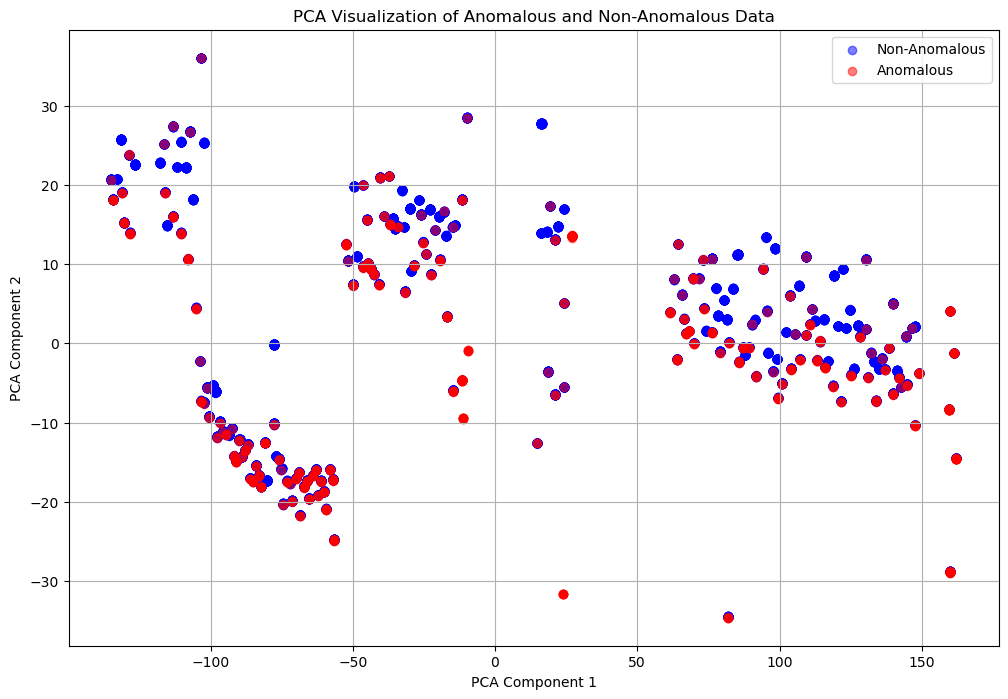

In [15]:
# Perform PCA on the combined dataset (both anomalies and non-anomalies)
pca_combined = PCA(n_components=2)
pca_results_combined = pca_combined.fit_transform(encoded_data)

# Separate the PCA results for anomalies and non-anomalies
pca_anomalies = pca_results_combined[labels == -1]
pca_non_anomalies = pca_results_combined[labels == 1]

# Plot the combined PCA results
plt.figure(figsize=(12, 8))
plt.scatter(pca_non_anomalies[:, 0], pca_non_anomalies[:, 1], c='blue', label='Non-Anomalous', alpha=0.5)
plt.scatter(pca_anomalies[:, 0], pca_anomalies[:, 1], c='red', label='Anomalous', alpha=0.5)
plt.title('PCA Visualization of Anomalous and Non-Anomalous Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()


Graph shows a high level of overlapping between anomalous and non-anomalous data, indicating that the combination of both encoded cateogrical features and numerical features does not deliver a clear anomaly detection result using Isolation Forest. The next step is to carry out feature engineering to obtain a clearer separation. This is to ensure that the Isolation Forest can effectively distinguish between anomalous and non-anomalous data other than relying solely on the F1-score.

#### Selecting only numerical features and leaving out categorical features

In [16]:
# Select numerical features
numerical_features = df_scaled.select_dtypes(include=['float64', 'int64']).columns
numerical_data = df_scaled[numerical_features]

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numerical_data)

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(normalized_data)

# Predict anomalies
anomalies = iso_forest.predict(normalized_data)

# Add the anomaly scores to the original data
df_scaled['Anomaly'] = anomalies

# Display the count of anomalies detected
anomaly_count = (anomalies == -1).sum()
anomaly_count




720

In [17]:
# Define custom scoring function for cross-validation
def anomaly_scorer(estimator, X, y):
    y_pred = estimator.fit_predict(X)
    return precision_score(y, y_pred, pos_label=-1), recall_score(y, y_pred, pos_label=-1), f1_score(y, y_pred, pos_label=-1)

# Prepare labels for the data (this example assumes binary labels with 1 for normal and -1 for anomalies)
labels = df_scaled['Anomaly']

# Define the cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
precision_scores = cross_val_score(iso_forest, normalized_data, labels, cv=kfold, scoring=make_scorer(precision_score, pos_label=-1))
recall_scores = cross_val_score(iso_forest, normalized_data, labels, cv=kfold, scoring=make_scorer(recall_score, pos_label=-1))
f1_scores = cross_val_score(iso_forest, normalized_data, labels, cv=kfold, scoring=make_scorer(f1_score, pos_label=-1))

# Average the results
avg_precision = precision_scores.mean()
avg_recall = recall_scores.mean()
avg_f1 = f1_scores.mean()


avg_precision, avg_recall, avg_f1

(0.8558635277855849, 0.8569444444444445, 0.8559528724120387)

### Model Evaluation Results

Average Precision: 85.59%, Average Recall: 85.69%, Average F1-Score: 85.60%

There is an increase in F1-score compared to the previous (79.77%). Further visualisation of the anomalous and non-anomalous data is required to validate this.

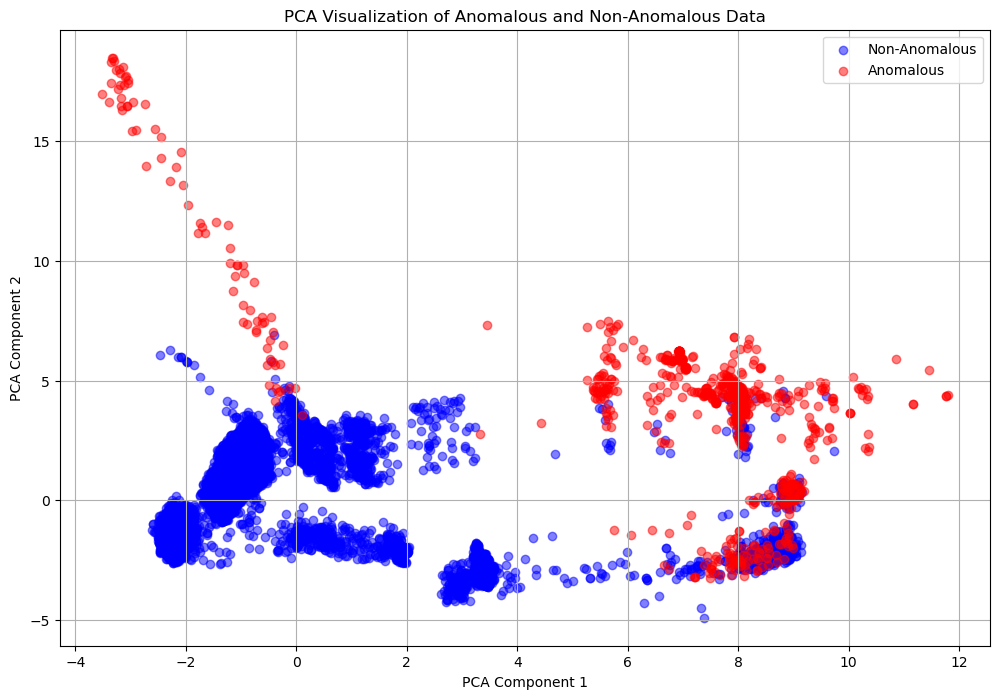

In [18]:
# Perform PCA on the combined dataset (both anomalies and non-anomalies)
pca_combined = PCA(n_components=2)
pca_results_combined = pca_combined.fit_transform(normalized_data)

# Separate the PCA results for anomalies and non-anomalies
pca_anomalies = pca_results_combined[labels == -1]
pca_non_anomalies = pca_results_combined[labels == 1]

# Plot the combined PCA results
plt.figure(figsize=(12, 8))
plt.scatter(pca_non_anomalies[:, 0], pca_non_anomalies[:, 1], c='blue', label='Non-Anomalous', alpha=0.5)
plt.scatter(pca_anomalies[:, 0], pca_anomalies[:, 1], c='red', label='Anomalous', alpha=0.5)
plt.title('PCA Visualization of Anomalous and Non-Anomalous Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

Graph shows significant decrease in overlapping and a clearer separation between anomalous and non-anomalous data. This indicates that the inclusion of categorical features into the model training introduces a risk to anomaly detection. The next step would be to carry out hyperparameter tuning to optimize the model.

### Hyperparameter Tuning (Contamination Value)

Instead of 0.05, the contamination value is now set as 0.1

In [19]:
# Select numerical features
numerical_features = df_scaled.select_dtypes(include=['float64', 'int64']).columns
numerical_data = df_scaled[numerical_features]

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numerical_data)

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(normalized_data)

# Predict anomalies
anomalies = iso_forest.predict(normalized_data)

# Add the anomaly scores to the original data
df_scaled['Anomaly'] = anomalies

# Display the count of anomalies detected
anomaly_count = (anomalies == -1).sum()
anomaly_count


1439

In [20]:
# Define custom scoring function for cross-validation
def anomaly_scorer(estimator, X, y):
    y_pred = estimator.fit_predict(X)
    return precision_score(y, y_pred, pos_label=-1), recall_score(y, y_pred, pos_label=-1), f1_score(y, y_pred, pos_label=-1)

# Prepare labels for the data (1 for normal and -1 for anomalies)
labels = df_scaled['Anomaly']

# Define the cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
precision_scores = cross_val_score(iso_forest, normalized_data, labels, cv=kfold, scoring=make_scorer(precision_score, pos_label=-1))
recall_scores = cross_val_score(iso_forest, normalized_data, labels, cv=kfold, scoring=make_scorer(recall_score, pos_label=-1))
f1_scores = cross_val_score(iso_forest, normalized_data, labels, cv=kfold, scoring=make_scorer(f1_score, pos_label=-1))

# Average the results
avg_precision = precision_scores.mean()
avg_recall = recall_scores.mean()
avg_f1 = f1_scores.mean()


avg_precision, avg_recall, avg_f1

(0.9563672606276679, 0.9596810878823074, 0.9579485188518756)

### Model Evaluation Results

Average Precision: 96.64%, Average Recall: 95.97%, Average F1-Score: 95.79%

There is an increase in F1-score compared to the previous (85.60%). Further visualisation of the anomalous and non-anomalous data is required to validate this.

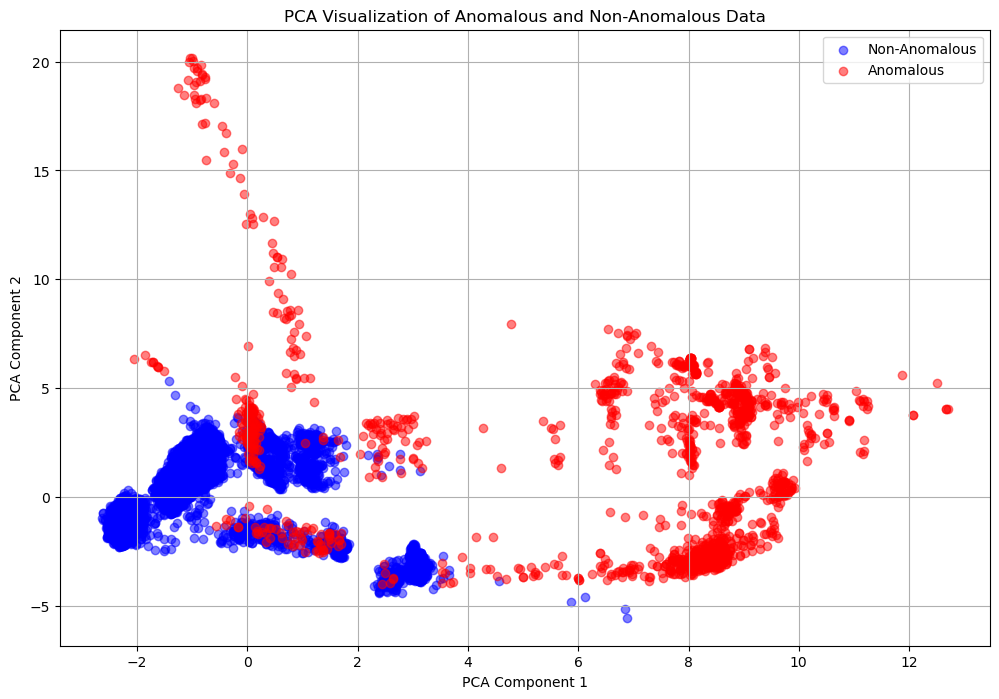

In [21]:
# Perform PCA on the combined dataset (both anomalies and non-anomalies)
pca_combined = PCA(n_components=2)
pca_results_combined = pca_combined.fit_transform(normalized_data)

# Separate the PCA results for anomalies and non-anomalies
pca_anomalies = pca_results_combined[labels == -1]
pca_non_anomalies = pca_results_combined[labels == 1]

# Plot the combined PCA results
plt.figure(figsize=(12, 8))
plt.scatter(pca_non_anomalies[:, 0], pca_non_anomalies[:, 1], c='blue', label='Non-Anomalous', alpha=0.5)
plt.scatter(pca_anomalies[:, 0], pca_anomalies[:, 1], c='red', label='Anomalous', alpha=0.5)
plt.title('PCA Visualization of Anomalous and Non-Anomalous Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

Graph shows significant decrease in points overlapping when contamination = 0.1 compared to 0.05 and a clearer separation between anomalous and non-anomalous data. The F1-score is also higher, indicating the the model's performance has improved.

#### GridSearchCV on Combination of Encoded Categorical and Numerical Features (Experiment)

In [60]:
# Extract feature names (excluding 'Anomaly')
feature_names = encoded_data.drop(columns=['Anomaly']).columns
features = encoded_data[feature_names]
labels = encoded_data['Anomaly']

param_grid = {
    'n_estimators': [50, 100, 150],  # Number of base estimators in the ensemble
    'max_samples': ['auto', 0.5, 0.75],  # Number of samples to draw from to train each base estimator
    'contamination': [0.01, 0.03, 0.05, 0.1],  # Proportion of outliers in the dataset
    'max_features': [1.0, 0.8, 0.5],  # Number of features to draw from to train each base estimator
    'bootstrap': [True, False],  # Whether to use bootstrap sampling
}

# Custom scorer using F1 score
f1_scorer = make_scorer(f1_score, pos_label=-1)  # Anomalies are labeled as -1


In [ ]:
# Initialize the Isolation Forest
iso_forest = IsolationForest(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=iso_forest, param_grid=param_grid, scoring=f1_scorer, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(features, labels)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [63]:
print("Best Parameters:", best_params)
print("Best F1 Score:", best_score)

Best Parameters: {'bootstrap': True, 'contamination': 0.1, 'max_features': 0.8, 'max_samples': 'auto', 'n_estimators': 50}
Best F1 Score: 0.6556141364840967
